# Feature Engineering in Bureau Data

### 0. Import

In [3]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

- load bureau data

In [4]:
bureau = pd.read_csv('data/bureau.csv')
bureau_bal = pd.read_csv('data/bureau_balance.csv')

In [5]:
print(bureau_bal.shape)
bureau_bal.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
print(bureau.shape)
bureau.head()


(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


- import pickle data apps02

In [6]:
with open('apps02.pkl', 'rb') as f:
    apps = pd.read_pickle(f)

apps.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD,APPS_ANNUITY_CREDIT_RATIO,APPS_GOODS_CREDIT_RATIO,APPS_CREDIT_GOODS_DIFF,APPS_ANNUITY_INCOME_RATIO,APPS_CREDIT_INCOME_RATIO,APPS_GOODS_INCOME_RATIO,APPS_EMPLOYED_BIRTH_RATIO,APPS_INCOME_EMPLOYED_RATIO,APPS_INCOME_BIRTH_RATIO,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198

In [9]:
bureau.info()

bureau.isnull().sum()
# Many Features have missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

<Axes: >

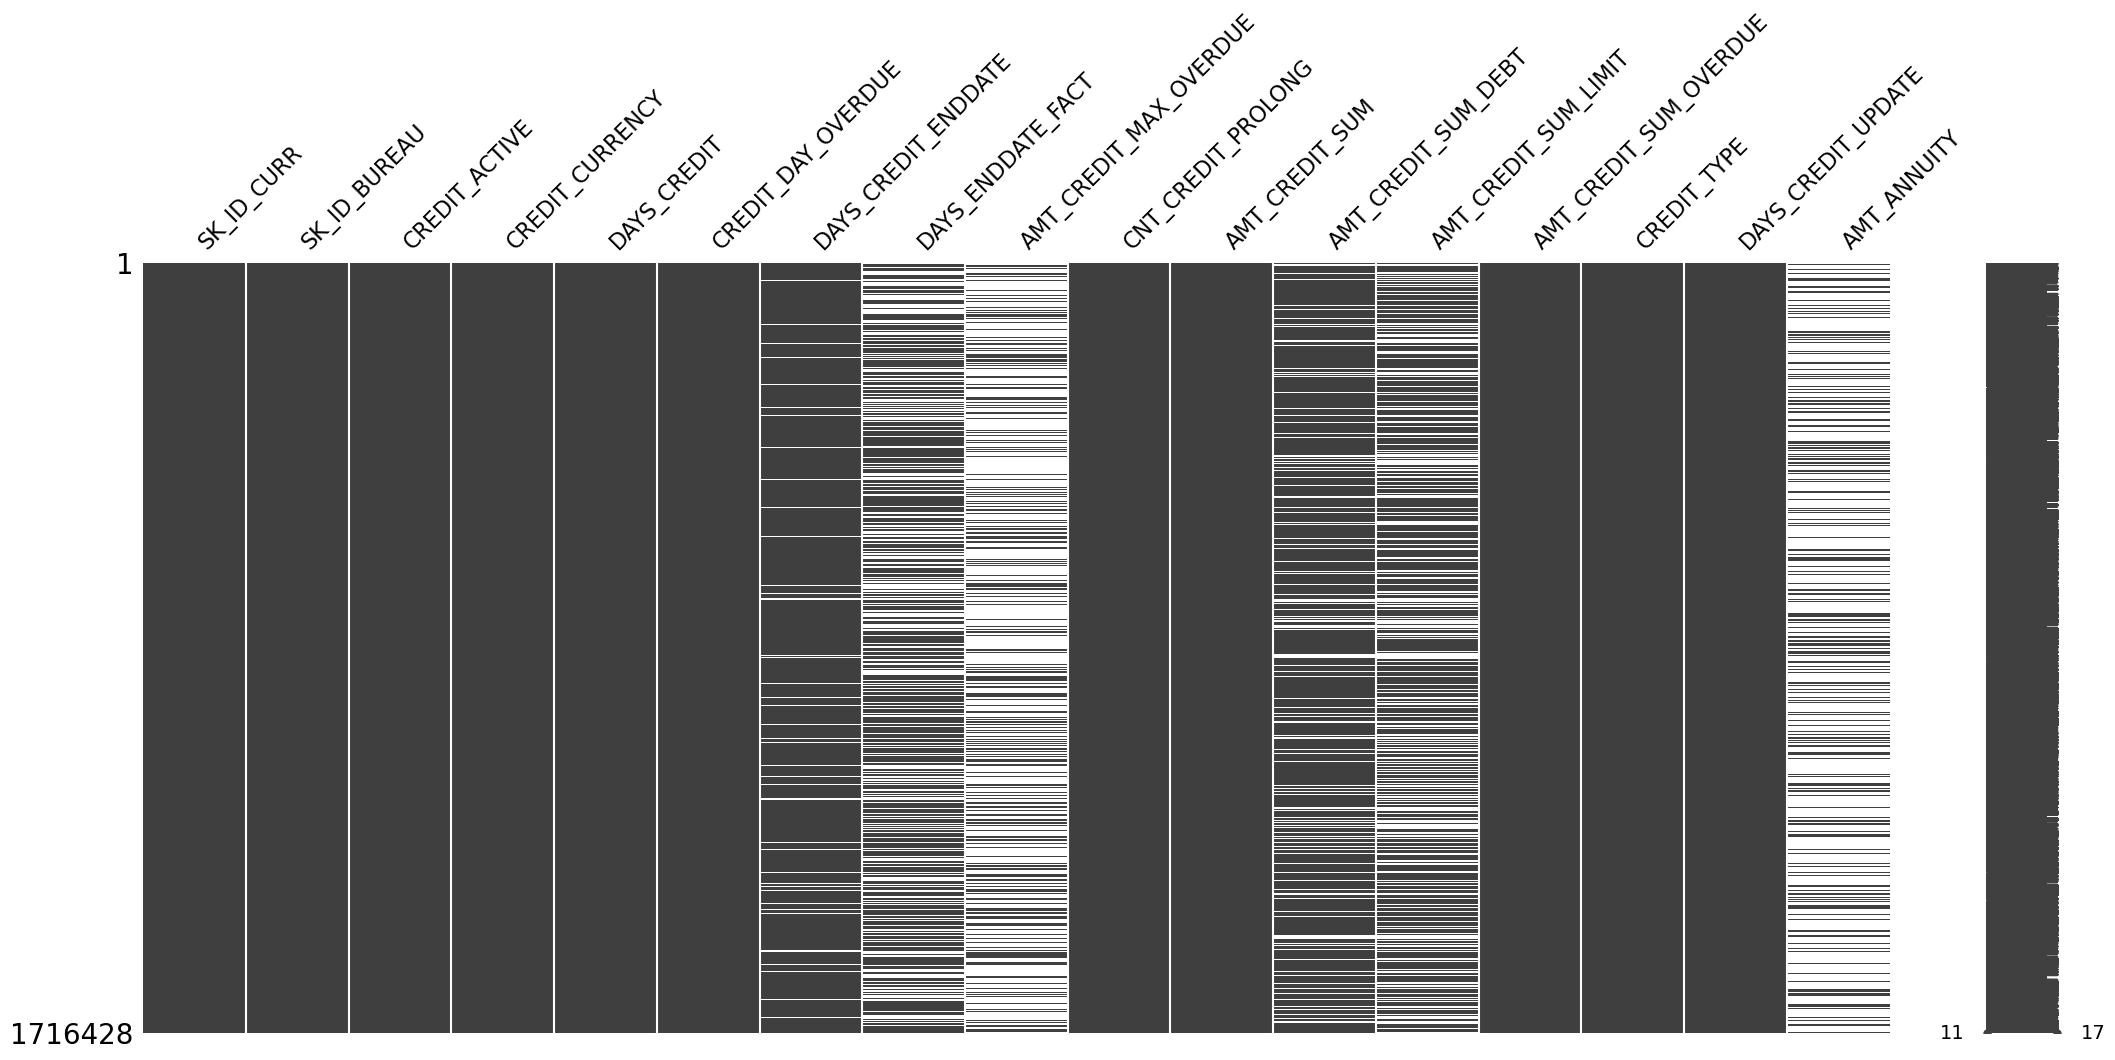

In [11]:
import missingno as msno
msno.matrix(bureau)

In [10]:
bureau_bal.info()

bureau_bal.isnull().sum()
# There are no missing values in bureau_bal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### 1. Visualize Histogram for numerical data when TARGET is 0 or 1 respectively 

In [7]:
# To get 'TARGET' column, we need to merge 'bureau' and 'apps' data.
bureau_app = bureau.merge(apps[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
bureau_app.head(20)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN,0.0
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN,0.0
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN,0.0
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN,0.0
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN,0.0


feature: DAYS_CREDIT


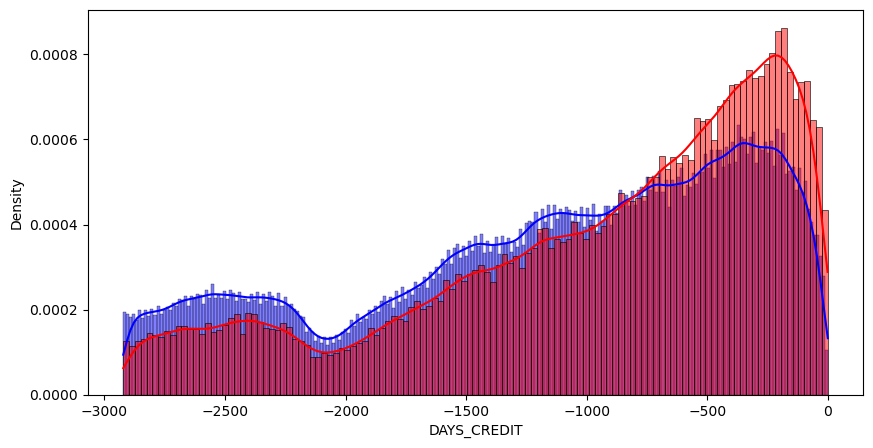

feature: CREDIT_DAY_OVERDUE


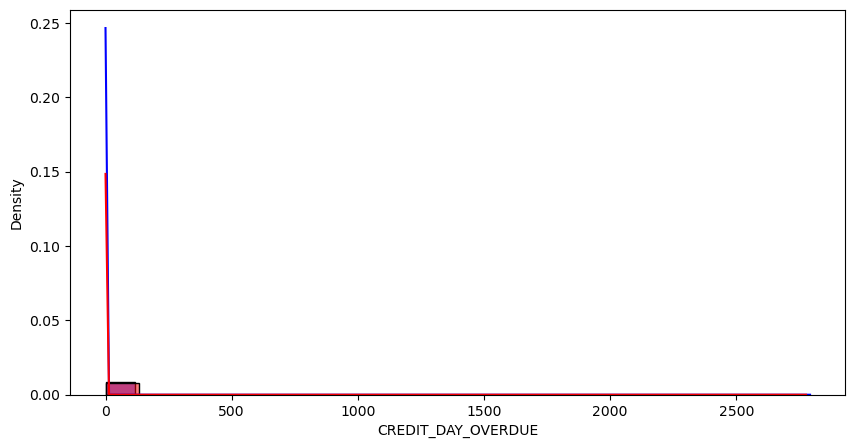

feature: DAYS_CREDIT_ENDDATE


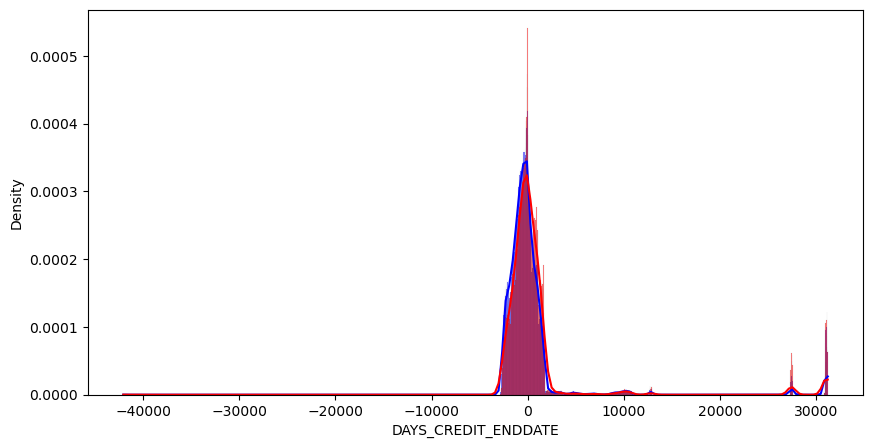

feature: DAYS_ENDDATE_FACT


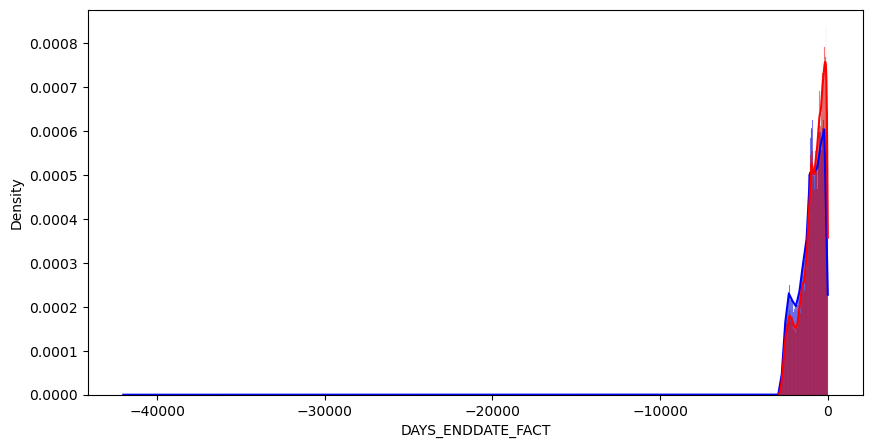

feature: AMT_CREDIT_MAX_OVERDUE


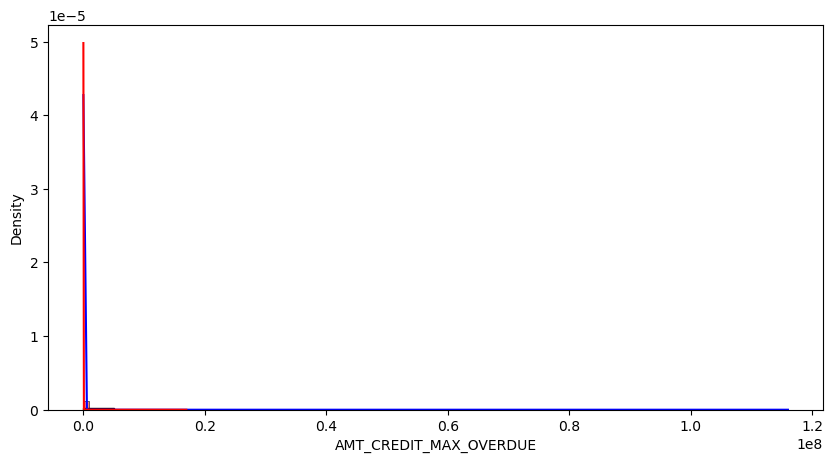

feature: CNT_CREDIT_PROLONG


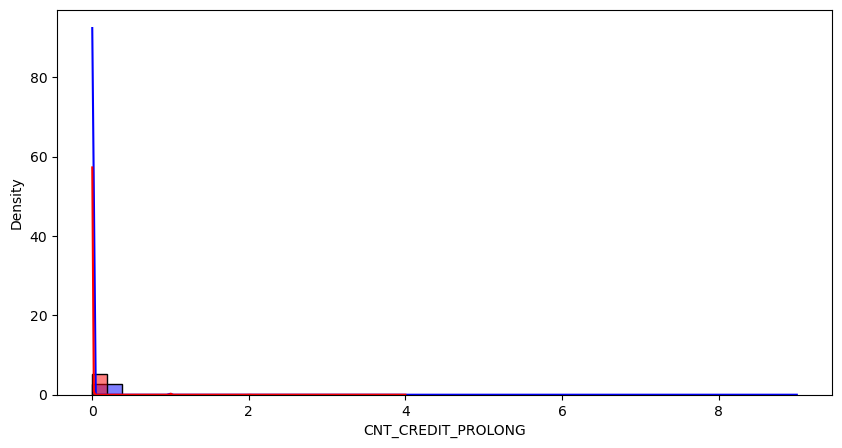

feature: AMT_CREDIT_SUM


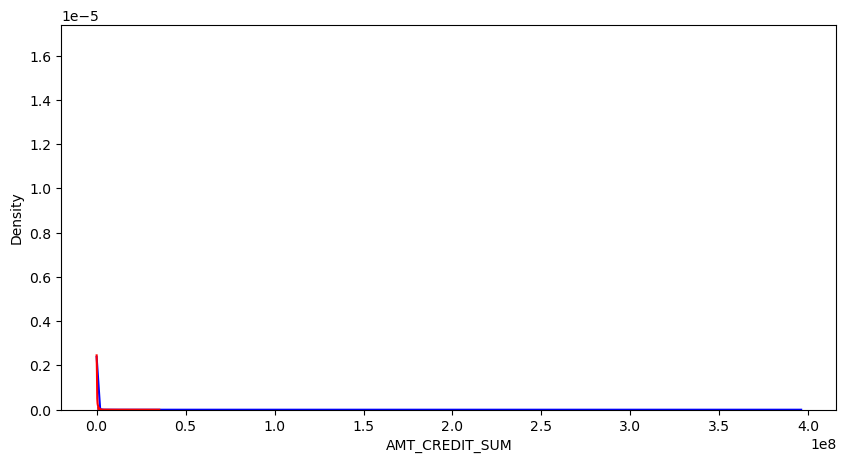

feature: AMT_CREDIT_SUM_DEBT


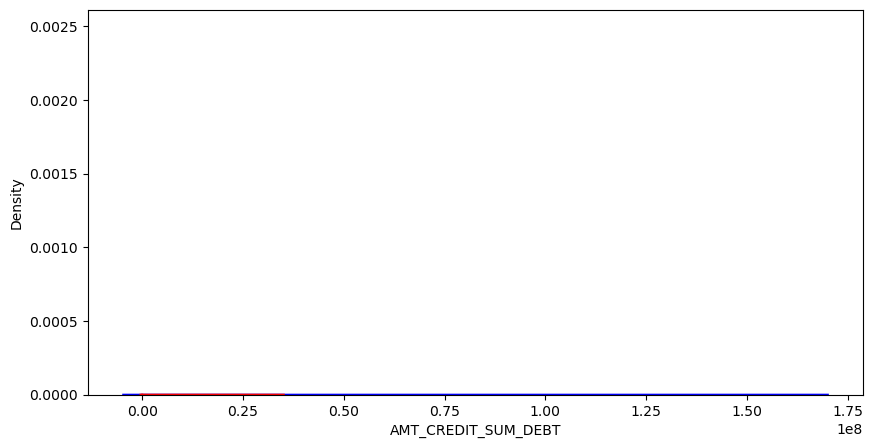

feature: AMT_CREDIT_SUM_LIMIT


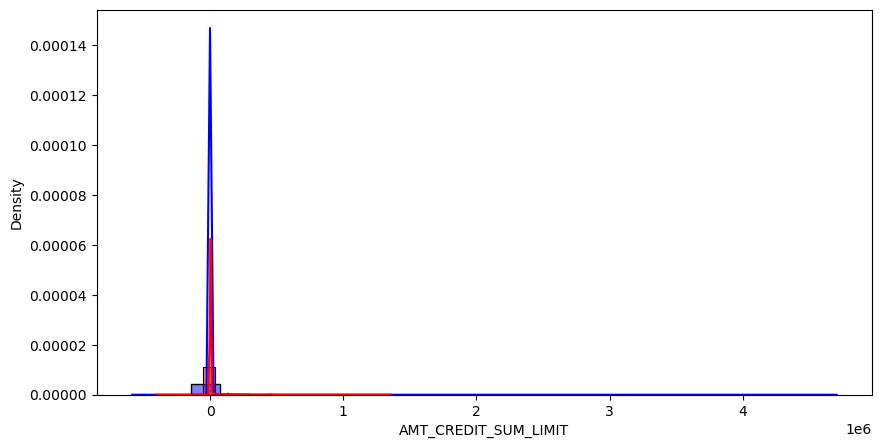

feature: AMT_CREDIT_SUM_OVERDUE


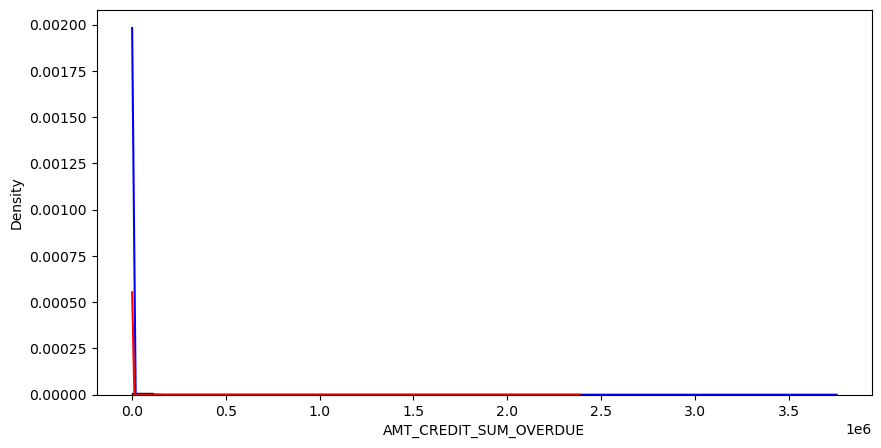

feature: DAYS_CREDIT_UPDATE


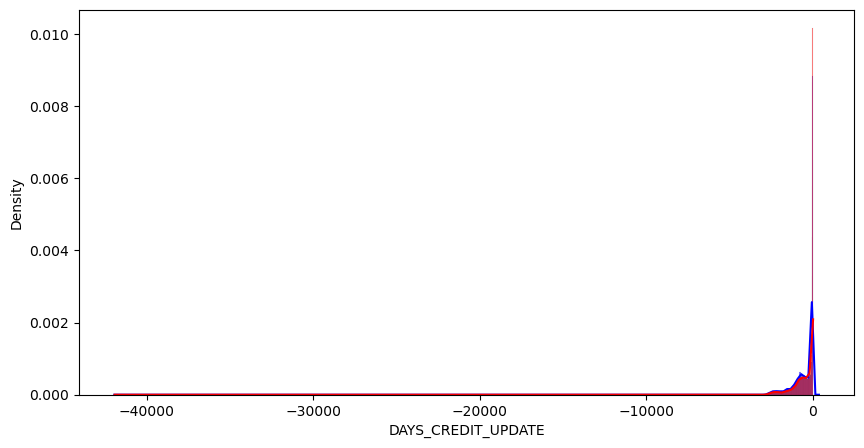

feature: AMT_ANNUITY


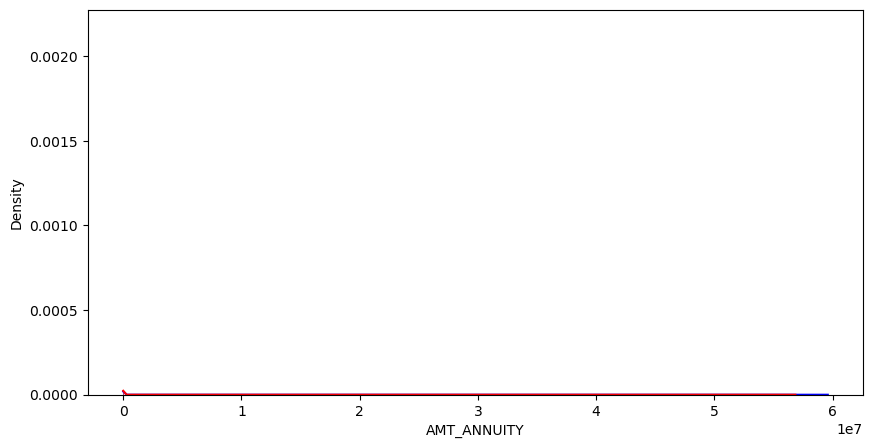

In [6]:
num_cols = bureau_app.dtypes[bureau_app.dtypes != 'object'].index.tolist()
num_cols = [col for col in num_cols if col not in ['SK_ID_CURR','TARGET','SK_ID_BUREAU']]

def show_hist_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    for feature in features:
        print(f'feature: {feature}')
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.histplot(df[cond0 & np.isfinite(df[feature])][feature] , color='blue', kde=True, stat= 'density', label='TARGET= 0')
        sns.histplot(df[cond1 & np.isfinite(df[feature])][feature] , color='red', kde=True, stat= 'density', label='TARGET= 1')
        plt.show()

show_hist_by_target(bureau_app, num_cols)


#### In the DAYS_CREDIT column, when TARGET=1, there are relatively more frequent recent loans

### 2. Visualize object - features 

feature: CREDIT_ACTIVE


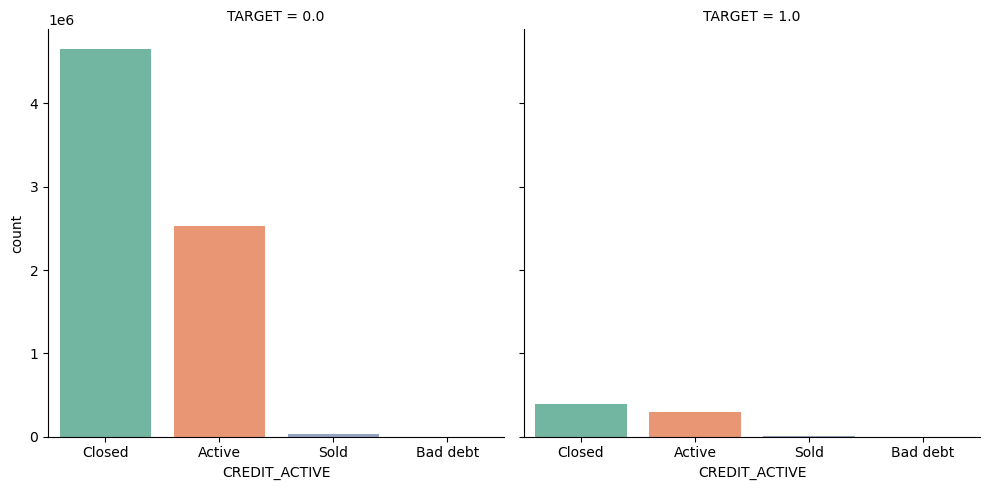

feature: CREDIT_CURRENCY


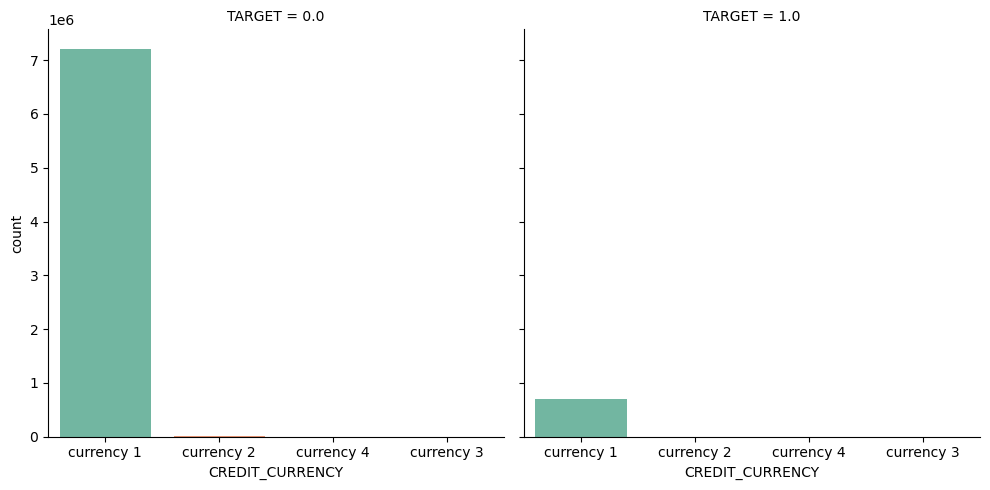

feature: CREDIT_TYPE


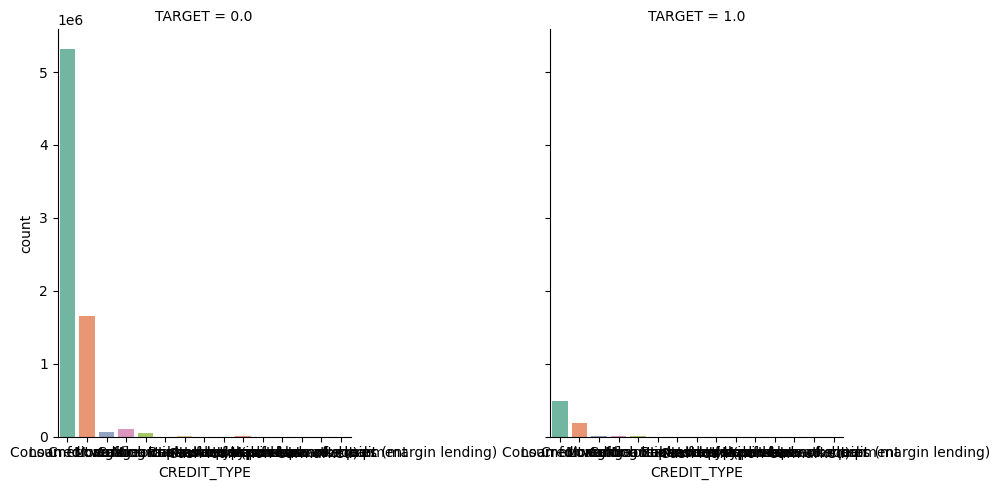

In [9]:
object_columns = bureau_app.dtypes[bureau_app.dtypes == 'object'].index.tolist()

def show_count_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    for feature in features:
        print(f'feature: {feature}')
        sns.catplot(x=feature, col='TARGET', data=df, kind='count', palette='Set2')
        plt.show()

show_count_by_target(bureau_app, object_columns)

### 3. Feature Engineering in bureau

- add some features 

In [8]:
bureau['BUREAU_ENDDATE_FACT_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
bureau['BUREAU_CREDIT_FACT_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']

bureau['BUREAU_CREDIT_DEBT_RATIO']=bureau['AMT_CREDIT_SUM_DEBT']/bureau['AMT_CREDIT_SUM']
bureau['BUREAU_CREDIT_DEBT_DIFF'] = bureau['AMT_CREDIT_SUM_DEBT'] - bureau['AMT_CREDIT_SUM']

- CREDIT_DAY_OVERDUE 

In [9]:
bureau['CREDIT_DAY_OVERDUE'].value_counts()
# Most of the values are 0. 

CREDIT_DAY_OVERDUE
0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: count, Length: 942, dtype: int64

In [10]:
bureau[bureau['CREDIT_DAY_OVERDUE']>0].shape

(4217, 22)

In [11]:
bureau[bureau['CREDIT_DAY_OVERDUE']>120].shape

(1143, 22)

<Axes: >

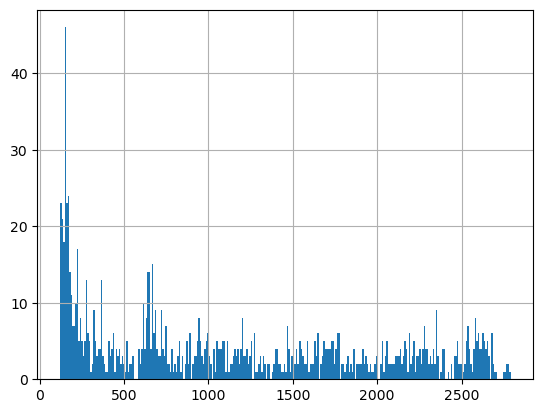

In [12]:
bureau[bureau['CREDIT_DAY_OVERDUE']>120]['CREDIT_DAY_OVERDUE'].hist(bins=300)

#### If the value is over 0, it means that the loan is overdue 

In [13]:

bureau['IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
bureau['IS_DPD_OVER_120'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 120 else 0)

In [20]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,BUREAU_ENDDATE_FACT_DIFF,BUREAU_CREDIT_FACT_DIFF,BUREAU_CREDIT_ENDDATE_DIFF,BUREAU_CREDIT_DEBT_RATIO,BUREAU_CREDIT_DEBT_DIFF,IS_DPD,IS_DPD_OVER_120
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0.0,-344.0,-344.0,0.00000,-91323.0,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,-1283.0,0.76152,-53658.0,0,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,-731.0,NaN,NaN,0,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,-1826.0,NaN,NaN,0,0


 #### agg

In [14]:
agg_dict = {
    'SK_ID_BUREAU':['count'],
    'DAYS_CREDIT':['min', 'max', 'mean'],
    'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
    'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
    'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],

    'BUREAU_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
    'BUREAU_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
    'BUREAU_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
    'BUREAU_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
    'IS_DPD':['mean', 'sum'],
    'IS_DPD_OVER_120':['mean', 'sum']
}

In [15]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg(agg_dict)

bureau_agg.columns = ['BUREAU_' + ('_').join(col).upper() for col in bureau_agg.columns.ravel()]

In [16]:
bureau_agg = bureau_agg.reset_index()


#### Add DPD ratio and DPD > 120 ratio at SK_ID_CURR level

In [17]:
bureau_agg['BUREAU_DPD_RATIO'] = bureau_agg['BUREAU_IS_DPD_SUM'] / bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']
bureau_agg['BUREAU_DPD_OVER_120_RATIO'] = bureau_agg['BUREAU_IS_DPD_OVER_120_SUM'] / bureau_agg['BUREAU_SK_ID_BUREAU_COUNT']

bureau_agg.head()


,SK_ID_CURR,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_ENDDATE_FACT_MIN,BUREAU_DAYS_ENDDATE_FACT_MAX,BUREAU_DAYS_ENDDATE_FACT_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MIN,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MAX,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MIN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MAX,BUREAU_BUREAU_CREDIT_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MIN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MIN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MAX,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MEAN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MIN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MAX,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MEAN,BUREAU_IS_DPD_MEAN,BUREAU_IS_DPD_SUM,BUREAU_IS_DPD_OVER_120_MEAN,BUREAU_IS_DPD_OVER_120_SUM,BUREAU_DPD_RATIO,BUREAU_DPD_OVER_120_RATIO
0,100001,7,-1572,-49,-735.000000,0,0,0.0,-1329.0,1778.0,82.428571,-1328.0,-544.0,-825.500000,NaN,NaN,378000.0,207623.571429,1453365.000,373239.0,85240.928571,596686.5,0.0,0.0,0.0,10822.5,3545.357143,24817.5,-1.0,698.0,197.0,-335.0,-32.0,-228.750000,-1827.0,-243.0,-817.428571,0.0,0.987405,0.282518,-279720.0,-4761.0,-122382.642857,0.0,0,0.0,0,0.0,0.0
1,100002,8,-1437,-103,-874.000000,0,0,0.0,-1072.0,780.0,-349.000000,-1185.0,-36.0,-697.500000,5043.645,1681.029,450000.0,108131.945625,865055.565,245781.0,49156.200000,245781.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1029.0,252.6,-609.0,-76.0,-277.000000,-1822.0,-87.0,-719.833333,0.0,0.546180,0.136545,-204219.0,0.0,-98388.513000,0.0,0,0.0,0,0.0,0.0
2,100003,4,-2586,-606,-1400.750000,0,0,0.0,-2434.0,1216.0,-544.500000,-2131.0,-540.0,-1097.333333,0.000,0.000,810000.0,254350.125000,1017400.500,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,-303.0,201.0,-34.0,-1096.0,-154.0,-568.333333,-1822.0,-152.0,-856.250000,0.0,0.000000,0.000000,-810000.0,-22248.0,-254350.125000,0.0,0,0.0,0,0.0,0.0
3,100004,2,-1326,-408,-867.000000,0,0,0.0,-595.0,-382.0,-488.500000,-683.0,-382.0,-532.500000,0.000,0.000,94537.8,94518.900000,189037.800,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,88.0,44.0,-643.0,-26.0,-334.500000,-731.0,-26.0,-378.500000,0.0,0.000000,0.000000,-94537.8,-94500.0,-94518.900000,0.0,0,0.0,0,0.0,0.0
4,100005,3,-373,-62,-190.666667,0,0,0.0,-128.0,1324.0,439.333333,-123.0,-123.0,-123.000000,0.000,0.000,568800.0,219042.000000,657126.000,543087.0,189469.500000,568408.5,0.0,0.0,0.0,4261.5,1420.500000,4261.5,-5.0,-5.0,-5.0,-250.0,-250.0,-250.000000,-1461.0,-184.0,-630.000000,0.0,0.954794,0.601256,-58500.0,-4504.5,-29572.500000,0.0,0,0.0,0,0.0,0.0


### 4. Feature Engineering in bureau_bal

In [18]:
bureau_bal = bureau_bal.merge(bureau[['SK_ID_CURR', 'SK_ID_BUREAU']], on=[ 'SK_ID_BUREAU'], how='left')

In [19]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR
0,5715448,0,C,380361.0
1,5715448,-1,C,380361.0
2,5715448,-2,C,380361.0
3,5715448,-3,C,380361.0
4,5715448,-4,C,380361.0


- STATUS

In [20]:
bureau_bal['BUREAU_BAL_IS_DPD'] = bureau_bal['STATUS'].apply(lambda x: 1 if x in ['1','2','3','4','5'] else 0)
bureau_bal['BUREAU_BAL_IS_DPD_OVER_120'] = bureau_bal['STATUS'].apply(lambda x: 1 if x == '5' else 0)

bureau_bal.head()

bureau_bal.shape


(27299925, 6)

In [21]:
bureau_bal['BUREAU_BAL_IS_DPD'].value_counts()

BUREAU_BAL_IS_DPD
0    26956982
1      342943
Name: count, dtype: int64

    - agg

In [22]:
agg_dict =  {
    'SK_ID_CURR':['count'],
    'MONTHS_BALANCE':['min', 'max', 'mean'],
    'BUREAU_BAL_IS_DPD':['mean', 'sum'],
    'BUREAU_BAL_IS_DPD_OVER_120':['mean', 'sum']
}

bureau_bal_agg = bureau_bal.groupby('SK_ID_CURR').agg(agg_dict)

bureau_bal_agg.columns = ['BUREAU_BAL_' + ('_').join(col).upper() for col in bureau_bal_agg.columns.ravel()]
bureau_bal_agg = bureau_bal_agg.reset_index()

bureau_bal_agg.head()

,SK_ID_CURR,BUREAU_BAL_SK_ID_CURR_COUNT,BUREAU_BAL_MONTHS_BALANCE_MIN,BUREAU_BAL_MONTHS_BALANCE_MAX,BUREAU_BAL_MONTHS_BALANCE_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_SUM
0,100001.0,172,-51,0,-16.279070,0.005814,1,0.0,0
1,100002.0,110,-47,0,-24.554545,0.245455,27,0.0,0
2,100005.0,21,-12,0,-4.333333,0.000000,0,0.0,0
3,100010.0,72,-90,-2,-46.000000,0.000000,0,0.0,0
4,100013.0,230,-68,0,-29.373913,0.030435,7,0.0,0


    - Add DPD ratio and DPD > 120 ratio at SK_ID_CURR level

In [23]:
bureau_bal_agg['BUREAU_BAL_IS_DPD_RATIO'] = bureau_bal_agg['BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM']/bureau_bal_agg['BUREAU_BAL_SK_ID_CURR_COUNT']
bureau_bal_agg['BUREAU_BAL_IS_DPD_OVER_120_RATIO'] = bureau_bal_agg['BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_SUM']/bureau_bal_agg['BUREAU_BAL_SK_ID_CURR_COUNT']

bureau_bal_agg.head()

,SK_ID_CURR,BUREAU_BAL_SK_ID_CURR_COUNT,BUREAU_BAL_MONTHS_BALANCE_MIN,BUREAU_BAL_MONTHS_BALANCE_MAX,BUREAU_BAL_MONTHS_BALANCE_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_SUM,BUREAU_BAL_IS_DPD_RATIO,BUREAU_BAL_IS_DPD_OVER_120_RATIO
0,100001.0,172,-51,0,-16.279070,0.005814,1,0.0,0,0.005814,0.0
1,100002.0,110,-47,0,-24.554545,0.245455,27,0.0,0,0.245455,0.0
2,100005.0,21,-12,0,-4.333333,0.000000,0,0.0,0,0.000000,0.0
3,100010.0,72,-90,-2,-46.000000,0.000000,0,0.0,0,0.000000,0.0
4,100013.0,230,-68,0,-29.373913,0.030435,7,0.0,0,0.030435,0.0


### 5. Merge bureau_bal_agg with bureau_agg on 'SK_ID_CURR'

In [24]:
bureau_agg = bureau_agg.merge(bureau_bal_agg, on='SK_ID_CURR', how='left')

In [25]:
bureau_agg.head()

,SK_ID_CURR,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_ENDDATE_FACT_MIN,BUREAU_DAYS_ENDDATE_FACT_MAX,BUREAU_DAYS_ENDDATE_FACT_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MIN,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MAX,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MIN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MAX,BUREAU_BUREAU_CREDIT_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MIN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MIN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MAX,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MEAN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MIN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MAX,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MEAN,BUREAU_IS_DPD_MEAN,BUREAU_IS_DPD_SUM,BUREAU_IS_DPD_OVER_120_MEAN,BUREAU_IS_DPD_OVER_120_SUM,BUREAU_DPD_RATIO,BUREAU_DPD_OVER_120_RATIO,BUREAU_BAL_SK_ID_CURR_COUNT,BUREAU_BAL_MONTHS_BALANCE_MIN,BUREAU_BAL_MONTHS_BALANCE_MAX,BUREAU_BAL_MONTHS_BALANCE_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_SUM,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_MEAN,BUREAU_BAL_BUREAU_BAL_IS_DPD_OVER_120_SUM,BUREAU_BAL_IS_DPD_RATIO,BUREAU_BAL_IS_DPD_OVER_120_RATIO
0,100001,7,-1572,-49,-735.000000,0,0,0.0,-1329.0,1778.0,82.428571,-1328.0,-544.0,-825.500000,NaN,NaN,378000.0,207623.571429,1453365.000,373239.0,85240.928571,596686.5,0.0,0.0,0.0,10822.5,3545.357143,24817.5,-1.0,698.0,197.0,-335.0,-32.0,-228.750000,-1827.0,-243.0,-817.428571,0.0,0.987405,0.282518,-279720.0,-4761.0,-122382.642857,0.0,0,0.0,0,0.0,0.0,172.0,-51.0,0.0,-16.279070,0.005814,1.0,0.0,0.0,0.005814,0.0
1,100002,8,-1437,-103,-874.000000,0,0,0.0,-1072.0,780.0,-349.000000,-1185.0,-36.0,-697.500000,5043.645,1681.029,450000.0,108131.945625,865055.565,245781.0,49156.200000,245781.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1029.0,252.6,-609.0,-76.0,-277.000000,-1822.0,-87.0,-719.833333,0.0,0.546180,0.136545,-204219.0,0.0,-98388.513000,0.0,0,0.0,0,0.0,0.0,110.0,-47.0,0.0,-24.554545,0.245455,27.0,0.0,0.0,0.245455,0.0
2,100003,4,-2586,-606,-1400.750000,0,0,0.0,-2434.0,1216.0,-544.500000,-2131.0,-540.0,-1097.333333,0.000,0.000,810000.0,254350.125000,1017400.500,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,-303.0,201.0,-34.0,-1096.0,-154.0,-568.333333,-1822.0,-152.0,-856.250000,0.0,0.000000,0.000000,-810000.0,-22248.0,-254350.125000,0.0,0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,2,-1326,-408,-867.000000,0,0,0.0,-595.0,-382.0,-488.500000,-683.0,-382.0,-532.500000,0.000,0.000,94537.8,94518.900000,189037.800,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,88.0,44.0,-643.0,-26.0,-334.500000,-731.0,-26.0,-378.500000,0.0,0.000000,0.000000,-94537.8,-94500.0,-94518.900000,0.0,0,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,3,-373,-62,-190.666667,0,0,0.0,-128.0,1324.0,439.333333,-123.0,-123.0,-123.000000,0.000,0.000,568800.0,219042.000000,657126.000,543087.0,189469.500000,568408.5,0.0,0.0,0.0,4261.5,1420.500000,4261.5,-5.0,-5.0,-5.0,-250.0,-250.0,-250.000000,-1461.0,-184.0,-630.000000,0.0,0.954794,0.601256,-58500.0,-4504.5,-29572.500000,0.0,0,0.0,0,0.0,0.0,21.0,-12.0,0.0,-4.333333,0.000000,0.0,0.0,0.0,0.000000,0.0


### 6. Merge bureau_agg with apps on 'SK_ID_CURR'

In [26]:
apps = apps.merge(bureau_agg, on='SK_ID_CURR', how='left')

In [27]:
apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,APPS_INCOME_BIRTH_RATIO,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_ENDDATE_FACT_MIN,BUREAU_DAYS_ENDDATE_FACT_MAX,BUREAU_DAYS_ENDDATE_FACT_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MIN,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MAX,BUREAU_BUREAU_ENDDATE_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MIN,BUREAU_BUREAU_CREDIT_FACT_DIFF_MAX,BUREAU_BUREAU_CREDIT_FACT_DIFF_MEAN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MIN,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MAX,BUREAU_BUREAU_CREDIT_ENDDATE_DIFF_MEAN,BUREAU_BUREAU_CREDIT_DEBT_RATIO

### 7. Save file as .pickle

In [28]:
import pickle 

with open('apps03.pkl','wb') as f:
    pickle.dump(apps, f)